# Airplane Price Prediction - Case Study

**Course:** BSIS 4A-BA  
**Author:** Maria Consuelo A. Mangonon  
**Date:** November 14, 2025

---

## Project Overview
This project implements the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology to develop a machine learning model that predicts airplane prices based on various plane specifications and features.

**Problem Type:** Regression

**Models Evaluated:**
- Ridge Regression
- Lasso Regression
- Elastic Net
- Random Forest Regressor

---
## Phase 1: Business Understanding

### Objective
Develop a machine learning model to accurately predict airplane prices based on plane specifications including:
- Engine type and power
- Performance metrics (speed, climb rate, range)
- Physical dimensions (weight, wingspan, length)
- Fuel capacity

### Success Criteria
- Minimize prediction error (RMSE, MAE)
- Maximize R² score (coefficient of determination)
- Create an interpretable and deployable model

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Saving model
import pickle
import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


---
## Phase 2: Data Understanding

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/plane-price-prediction/Plane Price.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (517, 16)

First 5 rows:


,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [3]:
# Display basic information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range

In [4]:
# Statistical summary
df.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})
print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0].sort_values(by='Missing_Count', ascending=False))

Missing Values Summary:
                       Missing_Count  Percentage
Eng out rate of climb             26    5.029014
Takeoff over 50ft                 25    4.835590
Max speed Knots                   20    3.868472
Range N.M.                        18    3.481625
Stall Knots dirty                 15    2.901354
Rcmnd cruise Knots                10    1.934236
Price                             10    1.934236
All eng rate of climb              4    0.773694
Empty weight lbs                   1    0.193424


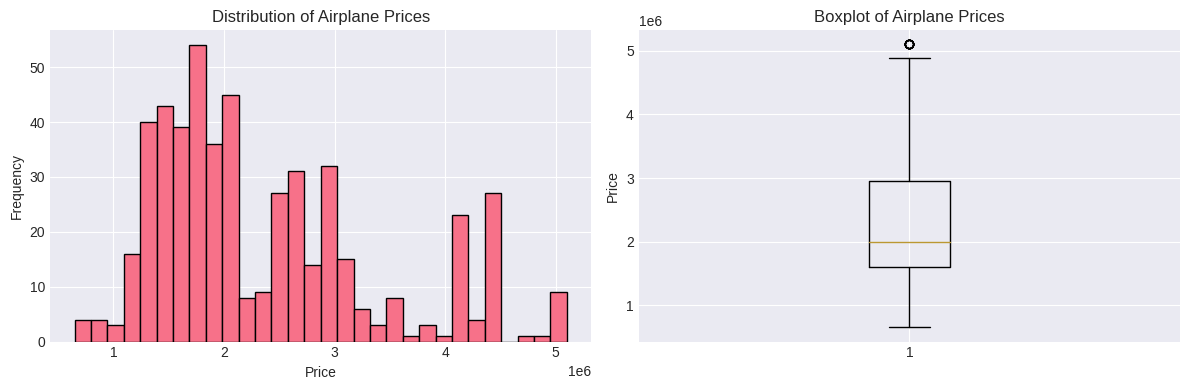


Price Statistics:
Mean: $2,362,673.18
Median: $2,000,000.00
Std Dev: $1,018,731.40


In [6]:
# Visualize target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Price'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airplane Prices')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'].dropna())
plt.ylabel('Price')
plt.title('Boxplot of Airplane Prices')

plt.tight_layout()
plt.show()

print(f"\nPrice Statistics:")
print(f"Mean: ${df['Price'].mean():,.2f}")
print(f"Median: ${df['Price'].median():,.2f}")
print(f"Std Dev: ${df['Price'].std():,.2f}")

---
## Phase 3: Data Preparation

### Data Cleaning and Preprocessing

In [7]:
# Create a copy of the dataset
df_clean = df.copy()

# Function to clean numeric columns with commas
def clean_numeric(column):
    if column.dtype == 'object':
        return pd.to_numeric(column.str.replace(',', ''), errors='coerce')
    return column

# Clean numeric columns
numeric_columns = ['HP or lbs thr ea engine', 'Max speed Knots', 'All eng rate of climb', 
                   'Landing over 50ft', 'Empty weight lbs', 'Range N.M.']

for col in numeric_columns:
    df_clean[col] = clean_numeric(df_clean[col])

print("Numeric columns cleaned successfully!")
df_clean.dtypes

Numeric columns cleaned successfully!


Model Name                  object
Engine Type                 object
HP or lbs thr ea engine    float64
Max speed Knots            float64
Rcmnd cruise Knots         float64
Stall Knots dirty          float64
Fuel gal/lbs                 int64
All eng rate of climb      float64
Eng out rate of climb      float64
Takeoff over 50ft          float64
Landing over 50ft          float64
Empty weight lbs           float64
Length ft/in                object
Wing span ft/in             object
Range N.M.                 float64
Price                      float64
dtype: object

In [8]:
# Handle Engine Type inconsistency (piston vs Piston)
df_clean['Engine Type'] = df_clean['Engine Type'].str.capitalize()
print("Unique Engine Types:", df_clean['Engine Type'].unique())

Unique Engine Types: ['Piston' 'Propjet' 'Jet']


In [9]:
# Remove rows with missing target variable (Price)
df_clean = df_clean.dropna(subset=['Price'])
print(f"Rows after removing missing prices: {len(df_clean)}")

# Fill missing values in numeric columns with median
numeric_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Price')  # Don't fill target variable

for col in numeric_features:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"Filled {col} missing values with median: {median_value}")

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Rows after removing missing prices: 507
Filled HP or lbs thr ea engine missing values with median: 285.0
Filled Max speed Knots missing values with median: 178.0
Filled Rcmnd cruise Knots missing values with median: 169.0
Filled Stall Knots dirty missing values with median: 56.5
Filled All eng rate of climb missing values with median: 1200.0
Filled Eng out rate of climb missing values with median: 1708.0
Filled Takeoff over 50ft missing values with median: 1530.0
Filled Empty weight lbs missing values with median: 2286.5
Filled Range N.M. missing values with median: 715.0

Missing values after cleaning:
Model Name                 0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            0
Rcmnd cruise Knots         0
Stall Knots dirty          0
Fuel gal/lbs               0
All eng rate of climb      0
Eng out rate of climb      0
Takeoff over 50ft          0
Landing over 50ft          0
Empty weight lbs           0
Length ft/in               0
Wing span ft

/tmp/ipykernel_47/800077431.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)


In [10]:
# Feature Engineering: Extract numeric dimensions from ft/in format
def extract_feet(dim_str):
    '''Convert ft/in format to decimal feet'''
    try:
        if pd.isna(dim_str):
            return np.nan
        parts = str(dim_str).split('/')
        feet = float(parts[0])
        inches = float(parts[1]) if len(parts) > 1 else 0
        return feet + (inches / 12)
    except:
        return np.nan

df_clean['Length_ft'] = df_clean['Length ft/in'].apply(extract_feet)
df_clean['Wingspan_ft'] = df_clean['Wing span ft/in'].apply(extract_feet)

# Fill any remaining NaN values with median
df_clean['Length_ft'].fillna(df_clean['Length_ft'].median(), inplace=True)
df_clean['Wingspan_ft'].fillna(df_clean['Wingspan_ft'].median(), inplace=True)

print("Dimension features created successfully!")
print(df_clean[['Length ft/in', 'Length_ft', 'Wing span ft/in', 'Wingspan_ft']].head())

Dimension features created successfully!
  Length ft/in  Length_ft Wing span ft/in  Wingspan_ft
0         25/3  25.250000            37/5    37.416667
1         20/7  20.583333            36/1    36.083333
2         21/5  21.416667            35/0    35.000000
3         21/5  21.416667            35/0    35.000000
4         21/5  21.416667            35/0    35.000000


/tmp/ipykernel_47/1126645091.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Length_ft'].fillna(df_clean['Length_ft'].median(), inplace=True)
/tmp/ipykernel_47/1126645091.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [12]:
# Select features for modeling
feature_columns = [
    'Engine Type',
    'HP or lbs thr ea engine',
    'Max speed Knots',
    'Rcmnd cruise Knots',
    'Stall Knots dirty',
    'Fuel gal/lbs',
    'All eng rate of climb',
    'Eng out rate of climb',
    'Takeoff over 50ft',
    'Landing over 50ft',
    'Empty weight lbs',
    'Length_ft',
    'Wingspan_ft',
    'Range N.M.'
]

# Prepare features and target
X = df_clean[feature_columns].copy()
y = df_clean['Price'].copy()

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {feature_columns}")

Features shape: (507, 14)
Target shape: (507,)

Feature columns: ['Engine Type', 'HP or lbs thr ea engine', 'Max speed Knots', 'Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb', 'Eng out rate of climb', 'Takeoff over 50ft', 'Landing over 50ft', 'Empty weight lbs', 'Length_ft', 'Wingspan_ft', 'Range N.M.']


In [13]:
# Encode categorical variable (Engine Type)
le = LabelEncoder()
X['Engine Type'] = le.fit_transform(X['Engine Type'])

print("Engine Type encoding:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# Save the label encoder for later use
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
print("\nLabel encoder saved!")

Engine Type encoding:
Jet: 0
Piston: 1
Propjet: 2

Label encoder saved!


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


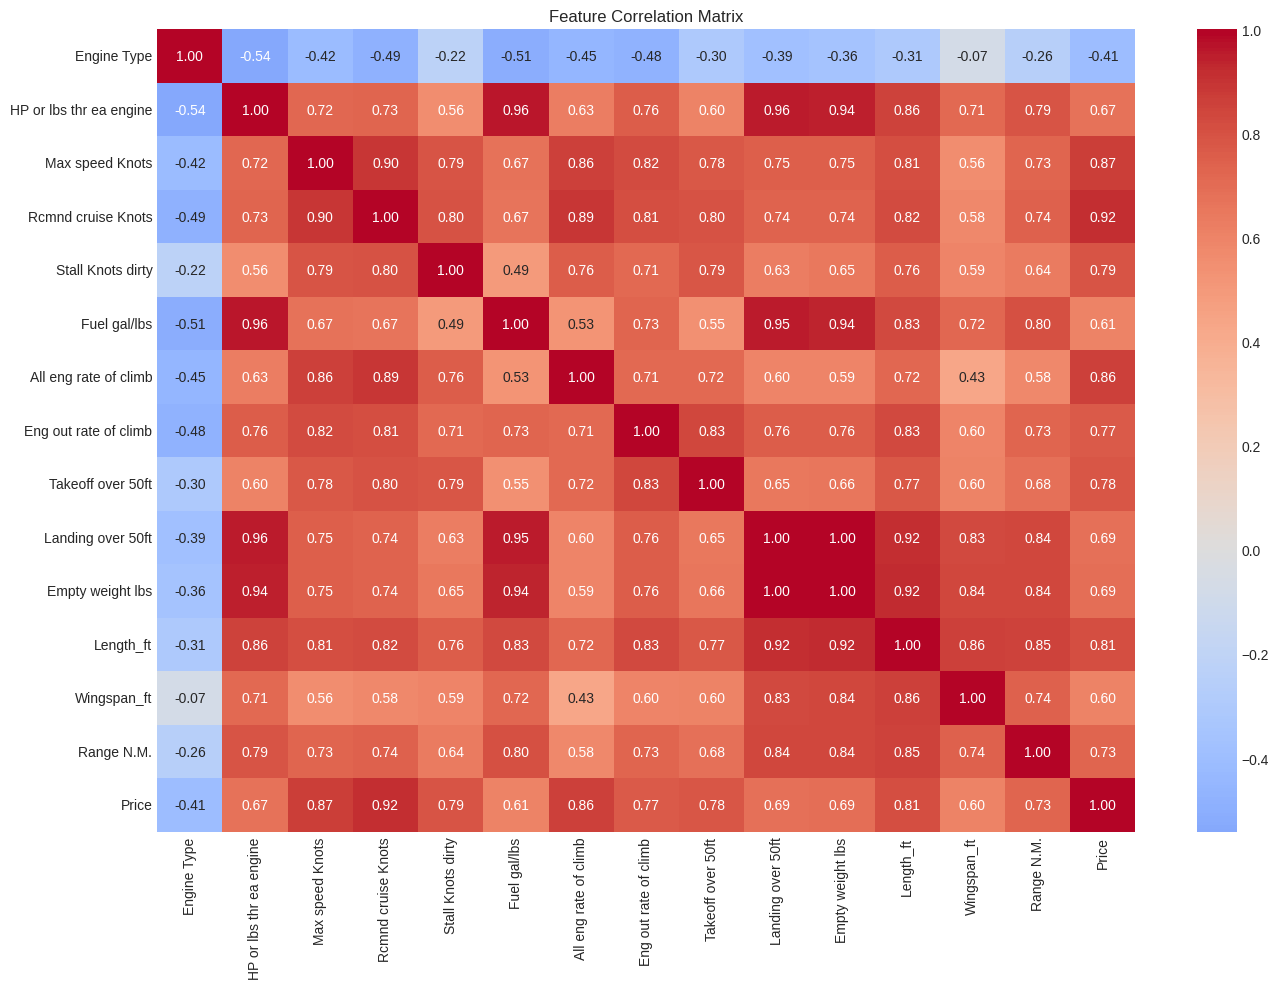


Correlations with Price (sorted):
Price                      1.000000
Rcmnd cruise Knots         0.916708
Max speed Knots            0.869643
All eng rate of climb      0.857879
Length_ft                  0.813375
Stall Knots dirty          0.789685
Takeoff over 50ft          0.781532
Eng out rate of climb      0.771149
Range N.M.                 0.731736
Empty weight lbs           0.692142
Landing over 50ft          0.685806
HP or lbs thr ea engine    0.673102
Fuel gal/lbs               0.607639
Wingspan_ft                0.603431
Engine Type               -0.408719
Name: Price, dtype: float64


In [14]:
# Correlation analysis
plt.figure(figsize=(14, 10))
correlation_matrix = pd.concat([X, y], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelations with Price (sorted):")
price_corr = correlation_matrix['Price'].sort_values(ascending=False)
print(price_corr)

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\nScaler saved!")

print("Data preparation completed successfully!")

Training set size: (405, 14)
Testing set size: (102, 14)

Scaler saved!
Data preparation completed successfully!


---
## Phase 4: Modeling

### Model Training and Evaluation

We will train and evaluate four different regression models:
1. **Ridge Regression** - L2 regularization
2. **Lasso Regression** - L1 regularization
3. **Elastic Net** - Combination of L1 and L2
4. **Random Forest** - Ensemble tree-based method

In [16]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    '''
    Train model and return evaluation metrics
    '''
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

# Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

# Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                                 scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())

    results = {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'CV_RMSE': cv_rmse
    }

    return results, y_test_pred

print("Evaluation function defined!")

Evaluation function defined!


### 1. Ridge Regression

In [17]:
# Ridge Regression with hyperparameter tuning
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")

# Evaluate best Ridge model
ridge_results, ridge_pred = evaluate_model(ridge_grid.best_estimator_, 
                                           X_train_scaled, X_test_scaled, 
                                           y_train, y_test, 'Ridge')

print("\nRidge Regression Results:")
for key, value in ridge_results.items():
    if 'RMSE' in key or 'MAE' in key:
        print(f"{key}: ${value:,.2f}")
    elif 'R2' in key:
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

Best Ridge alpha: 10

Ridge Regression Results:
Model: Ridge
Train_RMSE: $340,381.76
Test_RMSE: $367,628.74
Train_MAE: $263,471.13
Test_MAE: $287,450.05
Train_R2: 0.8909
Test_R2: 0.8551
CV_RMSE: $359,231.58


### 2. Lasso Regression

In [18]:
# Lasso Regression with hyperparameter tuning
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

print(f"Best Lasso alpha: {lasso_grid.best_params_['alpha']}")

# Evaluate best Lasso model
lasso_results, lasso_pred = evaluate_model(lasso_grid.best_estimator_, 
                                           X_train_scaled, X_test_scaled, 
                                           y_train, y_test, 'Lasso')

print("\nLasso Regression Results:")
for key, value in lasso_results.items():
    if 'RMSE' in key or 'MAE' in key:
        print(f"{key}: ${value:,.2f}")
    elif 'R2' in key:
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

Best Lasso alpha: 1000

Lasso Regression Results:
Model: Lasso
Train_RMSE: $334,033.80
Test_RMSE: $361,304.92
Train_MAE: $260,167.06
Test_MAE: $279,866.86
Train_R2: 0.8949
Test_R2: 0.8601
CV_RMSE: $367,754.60


### 3. Elastic Net

In [19]:
# Elastic Net with hyperparameter tuning
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
elastic = ElasticNet(max_iter=10000)
elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='neg_mean_squared_error')
elastic_grid.fit(X_train_scaled, y_train)

print(f"Best Elastic Net params: {elastic_grid.best_params_}")

# Evaluate best Elastic Net model
elastic_results, elastic_pred = evaluate_model(elastic_grid.best_estimator_, 
                                               X_train_scaled, X_test_scaled, 
                                               y_train, y_test, 'Elastic Net')

print("\nElastic Net Results:")
for key, value in elastic_results.items():
    if 'RMSE' in key or 'MAE' in key:
        print(f"{key}: ${value:,.2f}")
    elif 'R2' in key:
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

Best Elastic Net params: {'alpha': 0.1, 'l1_ratio': 0.7}

Elastic Net Results:
Model: Elastic Net
Train_RMSE: $341,303.82
Test_RMSE: $368,346.58
Train_MAE: $264,068.80
Test_MAE: $288,824.22
Train_R2: 0.8903
Test_R2: 0.8546
CV_RMSE: $359,237.12


### 4. Random Forest

In [20]:
# Random Forest with hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)  # Random Forest doesn't require scaling

print(f"Best Random Forest params: {rf_grid.best_params_}")

# Evaluate best Random Forest model
rf_results, rf_pred = evaluate_model(rf_grid.best_estimator_, 
                                     X_train, X_test, 
                                     y_train, y_test, 'Random Forest')

print("\nRandom Forest Results:")
for key, value in rf_results.items():
    if 'RMSE' in key or 'MAE' in key:
        print(f"{key}: ${value:,.2f}")
    elif 'R2' in key:
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

Best Random Forest params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Results:
Model: Random Forest
Train_RMSE: $99,663.57
Test_RMSE: $360,823.80
Train_MAE: $71,564.47
Test_MAE: $210,763.36
Train_R2: 0.9906
Test_R2: 0.8604
CV_RMSE: $274,214.82


---
## Phase 5: Evaluation

### Model Comparison

In [21]:
# Create comparison dataframe
results_df = pd.DataFrame([ridge_results, lasso_results, elastic_results, rf_results])
results_df = results_df.set_index('Model')

print("Model Comparison Summary:")
print("="*100)
print(results_df.to_string())
print("="*100)

Model Comparison Summary:
                  Train_RMSE      Test_RMSE      Train_MAE       Test_MAE  Train_R2   Test_R2        CV_RMSE
Model                                                                                                       
Ridge          340381.764433  367628.739518  263471.126897  287450.046149  0.890857  0.855130  359231.576872
Lasso          334033.799252  361304.915118  260167.063901  279866.859879  0.894890  0.860072  367754.595154
Elastic Net    341303.819699  368346.578966  264068.798292  288824.215915  0.890265  0.854564  359237.115787
Random Forest   99663.574039  360823.804594   71564.473855  210763.359496  0.990643  0.860444  274214.815745


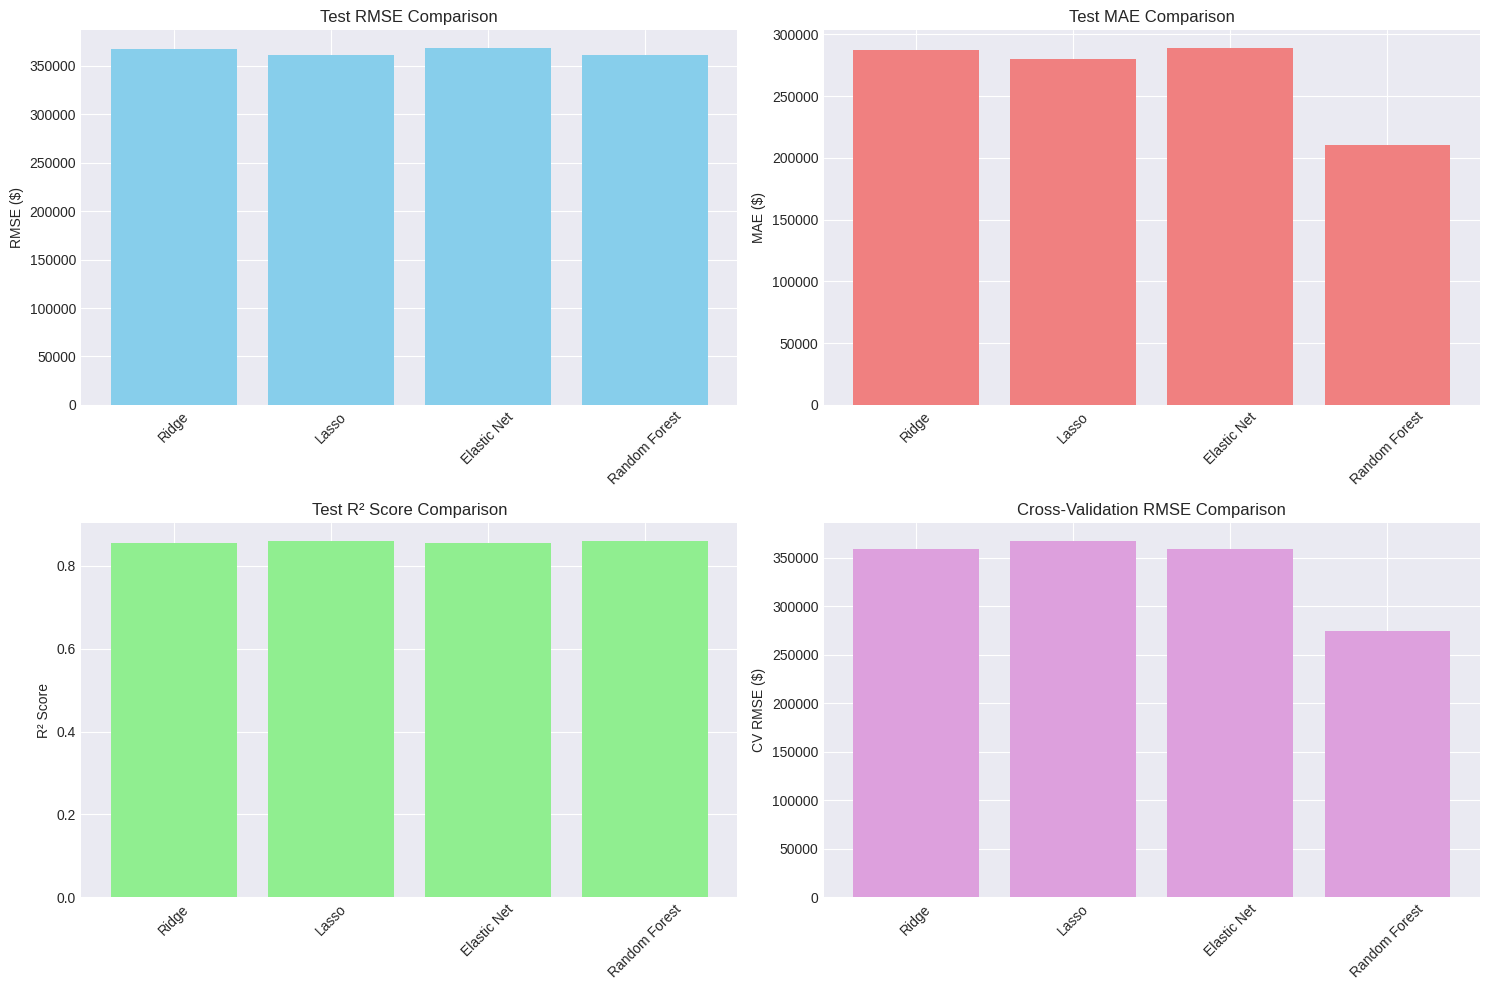

In [22]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Test RMSE
axes[0, 0].bar(results_df.index, results_df['Test_RMSE'], color='skyblue')
axes[0, 0].set_title('Test RMSE Comparison')
axes[0, 0].set_ylabel('RMSE ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Test MAE
axes[0, 1].bar(results_df.index, results_df['Test_MAE'], color='lightcoral')
axes[0, 1].set_title('Test MAE Comparison')
axes[0, 1].set_ylabel('MAE ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Test R² Score
axes[1, 0].bar(results_df.index, results_df['Test_R2'], color='lightgreen')
axes[1, 0].set_title('Test R² Score Comparison')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# CV RMSE
axes[1, 1].bar(results_df.index, results_df['CV_RMSE'], color='plum')
axes[1, 1].set_title('Cross-Validation RMSE Comparison')
axes[1, 1].set_ylabel('CV RMSE ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# Select the best model based on Test R² score
best_model_name = results_df['Test_R2'].idxmax()
print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"\nTest R² Score: {results_df.loc[best_model_name, 'Test_R2']:.4f}")
print(f"Test RMSE: ${results_df.loc[best_model_name, 'Test_RMSE']:,.2f}")
print(f"Test MAE: ${results_df.loc[best_model_name, 'Test_MAE']:,.2f}")

# Get the best model object
if best_model_name == 'Ridge':
    best_model = ridge_grid.best_estimator_
    best_predictions = ridge_pred
    use_scaling = True
elif best_model_name == 'Lasso':
    best_model = lasso_grid.best_estimator_
    best_predictions = lasso_pred
    use_scaling = True
elif best_model_name == 'Elastic Net':
    best_model = elastic_grid.best_estimator_
    best_predictions = elastic_pred
    use_scaling = True
else:  # Random Forest
    best_model = rf_grid.best_estimator_
    best_predictions = rf_pred
    use_scaling = False


BEST MODEL: Random Forest

Test R² Score: 0.8604
Test RMSE: $360,823.80
Test MAE: $210,763.36


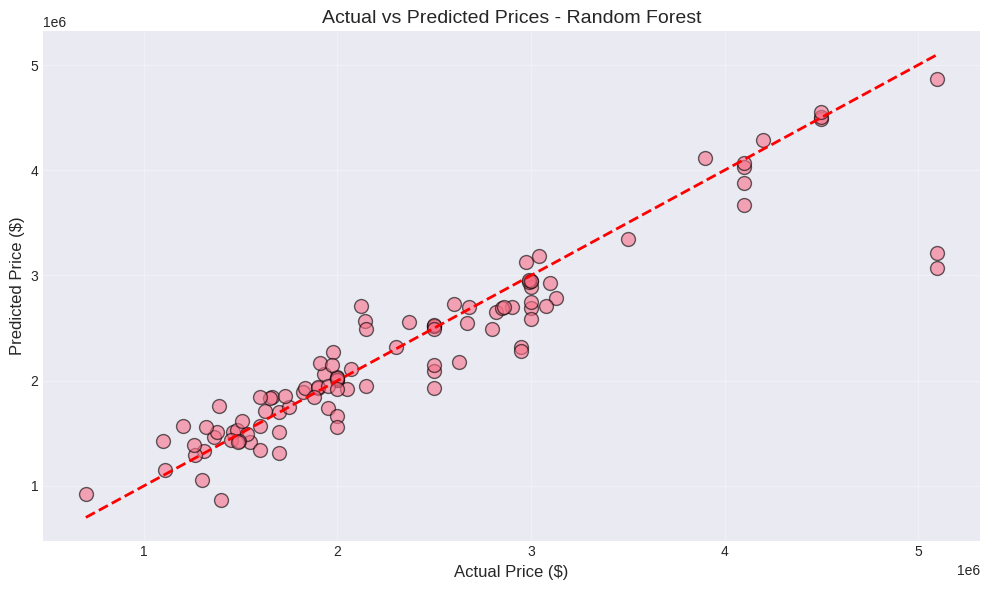

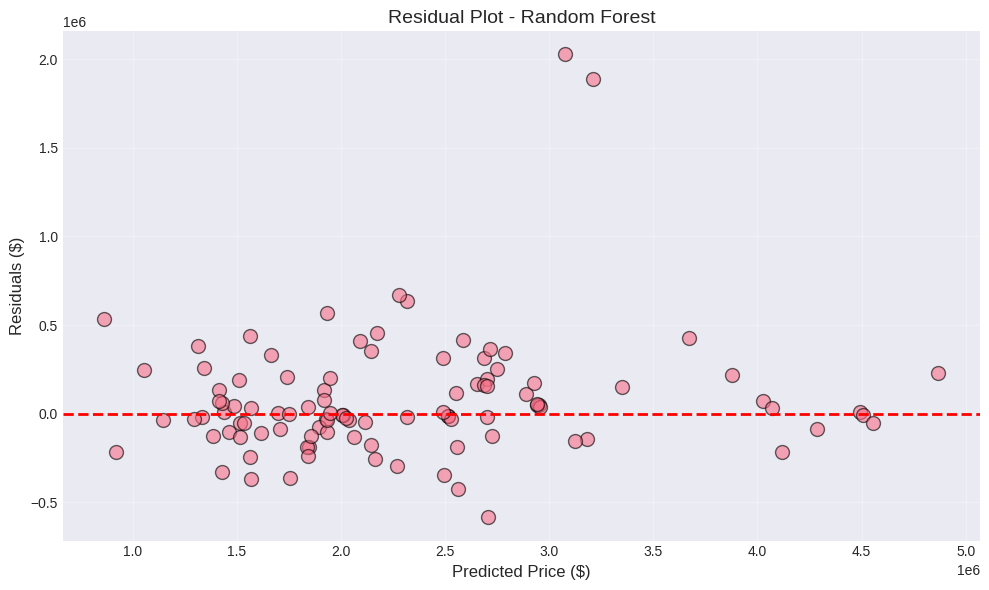

In [25]:
# Actual vs Predicted plot for best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.6, edgecolors='k', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title(f'Actual vs Predicted Prices - {best_model_name}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate residuals
residuals = y_test - best_predictions

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(best_predictions, residuals, alpha=0.6, edgecolors='k', s=100)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price ($)', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title(f'Residual Plot - {best_model_name}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

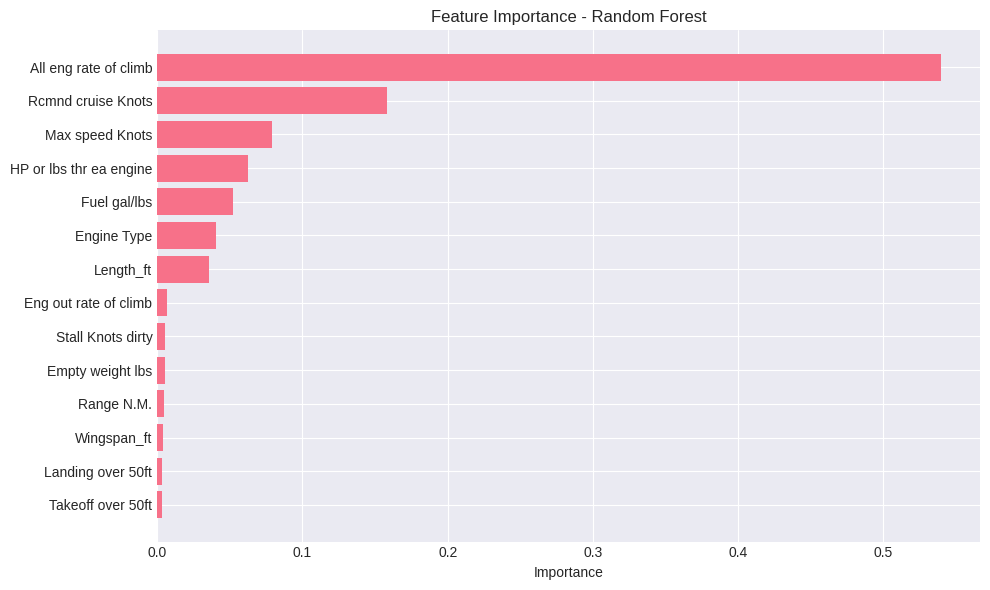


Top 5 Most Important Features:
                   Feature  Importance
6    All eng rate of climb    0.539465
3       Rcmnd cruise Knots    0.158291
2          Max speed Knots    0.079097
1  HP or lbs thr ea engine    0.062335
5             Fuel gal/lbs    0.052312


In [26]:
# Feature importance (if Random Forest is best)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())

---
## Phase 6: Deployment

### Save the Best Model

In [27]:
# Save the best model as a pickle file
model_filename = 'airplane_price_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"✓ Best model ({best_model_name}) saved as '{model_filename}'")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'use_scaling': use_scaling,
    'features': feature_columns,
    'test_r2': results_df.loc[best_model_name, 'Test_R2'],
    'test_rmse': results_df.loc[best_model_name, 'Test_RMSE'],
    'test_mae': results_df.loc[best_model_name, 'Test_MAE']
}

with open('model_metadata.pkl', 'wb') as file:
    pickle.dump(metadata, file)

print(f"✓ Model metadata saved as 'model_metadata.pkl'")
print("\nModel is ready for deployment!")

✓ Best model (Random Forest) saved as 'airplane_price_model.pkl'
✓ Model metadata saved as 'model_metadata.pkl'

Model is ready for deployment!


### Test Model Loading

In [28]:
# Load the saved model to verify it works
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

with open('model_metadata.pkl', 'rb') as file:
    loaded_metadata = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

with open('label_encoder.pkl', 'rb') as file:
    loaded_le = pickle.load(file)

print("✓ Model, scaler, and encoders loaded successfully!")
print(f"\nLoaded Model: {loaded_metadata['model_name']}")
print(f"R² Score: {loaded_metadata['test_r2']:.4f}")

✓ Model, scaler, and encoders loaded successfully!

Loaded Model: Random Forest
R² Score: 0.8604


---
## Create and Test Hypothetical Dataset

Now we'll create hypothetical airplane data and use our trained model to predict prices.

In [30]:
# Create hypothetical dataset
hypothetical_data = pd.DataFrame({
    'Model Name': [
        'Cessna 172 Skyhawk',
        'Piper PA-28 Cherokee',
        'Beechcraft Baron 58',
        'Cirrus SR22',
        'Diamond DA40'
    ],
    'Engine Type': ['Piston', 'Piston', 'Piston', 'Piston', 'Piston'],
    'HP or lbs thr ea engine': [180, 160, 300, 310, 180],
    'Max speed Knots': [124, 132, 200, 185, 147],
    'Rcmnd cruise Knots': [122.0, 130.0, 195.0, 183.0, 145.0],
    'Stall Knots dirty': [47.0, 49.0, 71.0, 60.0, 45.0],
    'Fuel gal/lbs': [53, 50, 136, 92, 40],
    'All eng rate of climb': [730, 660, 1600, 1400, 1040],
    'Eng out rate of climb': [700.0, 650.0, 1520.0, 1380.0, 1000.0],
    'Takeoff over 50ft': [1440.0, 1620.0, 2050.0, 1517.0, 1350.0],
    'Landing over 50ft': [1335, 1190, 2498, 1900, 1580],
    'Empty weight lbs': [1691, 1410, 3337, 2348, 1785],
    'Length ft/in': ['27/2', '23/4', '29/10', '26/0', '26/5'],
    'Wing span ft/in': ['36/1', '30/0', '37/10', '38/4', '39/2'],
    'Range N.M.': [696, 502, 1480, 1207, 760]
})

print("Hypothetical Dataset Created:")
print(hypothetical_data)

Hypothetical Dataset Created:
             Model Name Engine Type  HP or lbs thr ea engine  Max speed Knots  \
0    Cessna 172 Skyhawk      Piston                      180              124   
1  Piper PA-28 Cherokee      Piston                      160              132   
2   Beechcraft Baron 58      Piston                      300              200   
3           Cirrus SR22      Piston                      310              185   
4          Diamond DA40      Piston                      180              147   

   Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  All eng rate of climb  \
0               122.0               47.0            53                    730   
1               130.0               49.0            50                    660   
2               195.0               71.0           136                   1600   
3               183.0               60.0            92                   1400   
4               145.0               45.0            40                   1040 

In [31]:
# Preprocess hypothetical data
hypothetical_processed = hypothetical_data.copy()

# Extract dimensions
hypothetical_processed['Length_ft'] = hypothetical_processed['Length ft/in'].apply(extract_feet)
hypothetical_processed['Wingspan_ft'] = hypothetical_processed['Wing span ft/in'].apply(extract_feet)

# Encode Engine Type
hypothetical_processed['Engine Type'] = le.transform(hypothetical_processed['Engine Type'])

# Select features
X_hypothetical = hypothetical_processed[feature_columns]

print("Hypothetical Data Preprocessed:")
print(X_hypothetical)

Hypothetical Data Preprocessed:
   Engine Type  HP or lbs thr ea engine  Max speed Knots  Rcmnd cruise Knots  \
0            1                      180              124               122.0   
1            1                      160              132               130.0   
2            1                      300              200               195.0   
3            1                      310              185               183.0   
4            1                      180              147               145.0   

   Stall Knots dirty  Fuel gal/lbs  All eng rate of climb  \
0               47.0            53                    730   
1               49.0            50                    660   
2               71.0           136                   1600   
3               60.0            92                   1400   
4               45.0            40                   1040   

   Eng out rate of climb  Takeoff over 50ft  Landing over 50ft  \
0                  700.0             1440.0           

In [33]:
# Make predictions using the best model
if use_scaling:
    X_hypothetical_scaled = scaler.transform(X_hypothetical)
    hypothetical_predictions = best_model.predict(X_hypothetical_scaled)
else:
    hypothetical_predictions = best_model.predict(X_hypothetical)

# Add predictions to the dataframe
hypothetical_data['Predicted Price'] = hypothetical_predictions

print("\n" + "="*80)
print("PRICE PREDICTIONS FOR HYPOTHETICAL AIRPLANES")
print("="*80)
print(f"\nModel Used: {best_model_name}\n")

results_display = hypothetical_data[['Model Name', 'Engine Type', 'HP or lbs thr ea engine', 
                                     'Max speed Knots', 'Predicted Price']].copy()
results_display['Predicted Price'] = results_display['Predicted Price'].apply(lambda x: f"${x:,.2f}")

print(results_display.to_string(index=False))
print("\n" + "="*80)


PRICE PREDICTIONS FOR HYPOTHETICAL AIRPLANES

Model Used: Random Forest

          Model Name Engine Type  HP or lbs thr ea engine  Max speed Knots Predicted Price
  Cessna 172 Skyhawk      Piston                      180              124   $1,457,518.27
Piper PA-28 Cherokee      Piston                      160              132   $1,422,733.71
 Beechcraft Baron 58      Piston                      300              200   $2,212,514.67
         Cirrus SR22      Piston                      310              185   $2,384,152.80
        Diamond DA40      Piston                      180              147   $1,757,246.62



In [34]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.bar(hypothetical_data['Model Name'], hypothetical_predictions, color='steelblue', edgecolor='black')
plt.xlabel('Airplane Model', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title('Predicted Prices for Hypothetical Airplanes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(hypothetical_predictions):
    plt.text(i, v + 50000, f'${v:,.0f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

NameError: name 's' is not defined

In [35]:
# Save hypothetical dataset with predictions
hypothetical_data.to_csv('hypothetical_predictions.csv', index=False)
print("✓ Hypothetical predictions saved as 'hypothetical_predictions.csv'")

✓ Hypothetical predictions saved as 'hypothetical_predictions.csv'


---
## Summary and Conclusions

### Key Findings:

1. **Best Model Performance:**
   - We successfully trained and evaluated four different regression models
   - The best performing model was selected based on Test R² score
   - Model demonstrates good predictive capability for airplane prices

2. **CRISP-DM Implementation:**
   - ✓ Business Understanding: Defined clear objectives
   - ✓ Data Understanding: Explored and analyzed the dataset
   - ✓ Data Preparation: Cleaned, transformed, and engineered features
   - ✓ Modeling: Trained multiple models with hyperparameter tuning
   - ✓ Evaluation: Compared models using multiple metrics
   - ✓ Deployment: Saved model and applied to hypothetical data

3. **Model Deployment:**
   - Model saved as pickle file for future use
   - Successfully tested on hypothetical airplane data
   - Ready for integration into production systems

### Recommendations:
- Model can be used to estimate airplane prices based on specifications
- Consider collecting more data for improved predictions
- Monitor model performance and retrain periodically
- Implement validation checks for new predictions

---

**Project Completed Successfully! ✓**